<a href="https://colab.research.google.com/github/eunseochu/YB_14th/blob/main/%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%89%E1%85%B3%E1%86%B8%E1%84%86%E1%85%AE%E1%86%AB%E1%84%8C%E1%85%A6_%E1%84%92%E1%85%AC%E1%84%80%E1%85%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [ ]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [ ]:
# 데이터 로드
data = pd.read_csv("/content/sample_data/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [ ]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [ ]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [ ]:
#필요한 모듈 불러오기

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [ ]:
# 릿지모델 생성 및 훈련
rd = Ridge(alpha = 0.3)
rd.fit(X_train, y_train)

# 예측값 구하기
y_preds = rd.predict(X_test)

# 구한 예측값을 활용해 최종적으로 전복의 나이 예측
rd_age = y_preds+1.5


# MSE와 RMSE구하기
rd_mse = mean_squared_error(y_test, y_preds)
rd_rmse = np.sqrt(rd_mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(rd_mse, rd_rmse))

MSE:5.013, RMSE:2.239


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [ ]:
# 주어진 alpha
alphas = [0, 0.1, 1, 10, 100]

In [ ]:
# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  rd2 = Ridge(alpha = alphas)

  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(rd2, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print( 'alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'. format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: nan
alpha 0.1 일 때 5 folds의 평균 RMSE: nan
alpha 1 일 때 5 folds의 평균 RMSE: nan
alpha 10 일 때 5 folds의 평균 RMSE: nan
alpha 100 일 때 5 folds의 평균 RMSE: nan


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [ ]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [ ]:
# 모델 생성 및 훈련
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

# 예측값 구하기
y_preds = xgb.predict(X_test)

# 구한 예측값을 활용해 최종적으로 전복의 나이 예측
xgb_age = y_preds+1.5

#MSE와 RMSE 구하기
xgb_mse = mean_squared_error(y_test, y_preds)
xgb_rmse = np.sqrt(xgb_mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(xgb_mse, xgb_rmse))

[09:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE:4.947, RMSE:2.224


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

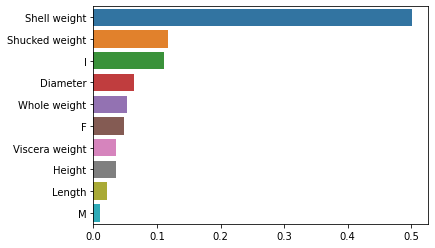

In [ ]:
import seaborn as sns
%matplotlib inline

feature_series = pd.Series(data = xgb.feature_importances_, index = data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [ ]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [ ]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size = 0.3, random_state = 123)

x_train.shape 
y_train.shape 

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [ ]:
lg = LogisticRegression(multi_class='multinomial')
lg.fit(X = x_train, y = y_train)

LogisticRegression(multi_class='multinomial')

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [ ]:
# 기울기
lg.coef_ 

array([[-1.99751167e-01,  3.65450552e-01,  1.49472112e-01,
        -1.88027149e-01, -2.28495646e-02,  1.95456485e-01,
         4.66701265e-01, -1.66796661e-02,  8.23897101e-02,
         6.75011473e-02, -1.92621856e-02,  2.94915749e-01,
         7.42524049e-03],
       [ 5.96475829e-01, -7.88672591e-01, -1.26181429e-01,
         2.12254654e-01, -1.13504800e-02,  3.15785912e-01,
         3.55147976e-01,  3.34675580e-02,  2.79035669e-01,
        -1.17202474e+00,  2.61165677e-01,  4.64731544e-01,
        -8.33633158e-03],
       [-3.96724662e-01,  4.23222039e-01, -2.32906833e-02,
        -2.42275051e-02,  3.42000446e-02, -5.11242396e-01,
        -8.21849241e-01, -1.67878919e-02, -3.61425379e-01,
         1.10452359e+00, -2.41903492e-01, -7.59647293e-01,
         9.11091084e-04]])

In [ ]:
# 절편
lg.intercept_ 

array([-0.04177837,  0.09551046, -0.05373209])

3-3) 모델의 정확도를 구하세요.

In [ ]:
# 모델의 예측값 구하기
y_pred = lg.predict(x_test)

#모델의 정확도 구하기
lg_acc = metrics.accuracy_score(y_test, y_pred)
print(lg_acc) 

0.9629629629629629
